## FORD GoBike SYSTEM DATA EXPLORATION
### by Sharon Mwendwa Kirimi

### INTRODUCTION

##### The FORD GoBike contains data about the individual rides made in the FORD GoBike system for bike sharing covering the San Franscisco area.

## Preliminary Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df1 = pd.read_csv("201902-fordgobike-tripdata.csv")

df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df1.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [4]:
df1.shape

(183412, 16)

### What is the structure of your dataset?
#### The dataset contains 183412 rows and 16 columns
### What is/are the main feature(s) of interest in your dataset?
1. Duration of the trips
2. Member birth year from which we shall know the age of the members
3. Member gender
4. User_type
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
1. Duration_sec
2. User_type
3. Member_birth_year



## Questions

1. What is the average age of the majority of the riders
2. What is the average duration of the rides
3. Does bike sharing affect the duration of the rides
4. What day of the week and month are the number of rides highest
5. What time are the number of rides highest

## ASSESSING

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df1.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
163948,666,2019-02-05 08:47:53.6160,2019-02-05 08:58:59.7840,245.0,Downtown Berkeley BART,37.870139,-122.268422,259.0,Addison St at Fourth St,37.866249,-122.299371,4522,Subscriber,1995.0,Male,No
77594,848,2019-02-19 06:27:37.4750,2019-02-19 06:41:45.7770,132.0,24th St at Chattanooga St,37.751819,-122.426614,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,6103,Subscriber,1994.0,Male,No
69533,1637,2019-02-19 19:00:10.7490,2019-02-19 19:27:28.5470,262.0,West St at University Ave,37.869967,-122.286533,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,4672,Subscriber,1989.0,Female,No
40316,418,2019-02-22 21:21:16.8290,2019-02-22 21:28:15.4320,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,6390,Subscriber,1998.0,Male,No
181517,326,2019-02-01 09:09:48.6390,2019-02-01 09:15:15.1250,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,343.0,Bryant St at 2nd St,37.783172,-122.393572,5216,Subscriber,NaN,NaN,No


In [7]:
df1.duplicated().any()

False

#### There are no duplicates in our data.

In [8]:
df1.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
df1['member_birth_year'].value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1928.0        1
1878.0        1
1930.0        1
1910.0        1
1927.0        1
Name: member_birth_year, Length: 75, dtype: int64

#### Issues to clean

1. Missing values in some columns
2. Wrong datatypes 
3. Calculate the age of the riders

In [10]:
# We make a copy of the dataset before we start cleaning

Ford_GoBike_df = df1.copy()

## Data Cleaning

#### 1. Missing values in some columns

In [11]:
#Drop the rows with missing values

Ford_GoBike_df.dropna(inplace = True)

In [12]:
Ford_GoBike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### 2. Wrong datatypes

##### (i) We should start by converting all the Ids to string datatype

In [13]:
Ford_GoBike_df['start_station_id'] = Ford_GoBike_df['start_station_id'].astype(str)
Ford_GoBike_df['end_station_id'] = Ford_GoBike_df['end_station_id'].astype(str)
Ford_GoBike_df['bike_id'] = Ford_GoBike_df['bike_id'].astype(str)

##### (ii) Convert start_time and end time to date timestamp and separate the months, weekdays and weekends

In [14]:
Ford_GoBike_df['start_time'] = pd.to_datetime(Ford_GoBike_df['start_time'])

In [15]:
Ford_GoBike_df['starting_day'] = Ford_GoBike_df['start_time'].dt.date
Ford_GoBike_df['starting_hour'] = Ford_GoBike_df['start_time'].dt.hour

In [16]:
# Getting the specific day names 
Ford_GoBike_df['start_day'] = pd.to_datetime(Ford_GoBike_df['start_time']).dt.day_name()

In [17]:
Ford_GoBike_df['end_time'] = pd.to_datetime(Ford_GoBike_df['end_time'])

In [18]:
Ford_GoBike_df['ending_day'] = Ford_GoBike_df['end_time'].dt.date
Ford_GoBike_df['ending_hour'] = Ford_GoBike_df['end_time'].dt.hour

In [19]:
Ford_GoBike_df['end_day'] = pd.to_datetime(Ford_GoBike_df['end_time']).dt.day_name()

#### We have now separated the start and end times from the dates so we can delete the start_time and end_time columns

In [20]:
Ford_GoBike_df.drop(columns = ['start_time', 'end_time'], inplace = True)

In [21]:
Ford_GoBike_df.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,starting_day,starting_hour,start_day,ending_day,ending_hour,end_day
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,17,Thursday,2019-03-01,8,Friday
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,12,Thursday,2019-03-01,5,Friday
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,17,Thursday,2019-03-01,4,Friday
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23,Thursday,2019-03-01,0,Friday
5,1793,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,23,Thursday,2019-03-01,0,Friday


#### (iii) Convert  bike_share_for_all_trip and user_type columns into catogorical datatype

In [22]:
Ford_GoBike_df['user_type'] = Ford_GoBike_df['user_type'].astype('category')
Ford_GoBike_df['bike_share_for_all_trip'] = Ford_GoBike_df['bike_share_for_all_trip'].astype('category')

### 3. Calculate the age of the riders.


In [23]:
Ford_GoBike_df['member_age'] = 2022-Ford_GoBike_df['member_birth_year']

In [24]:
Ford_GoBike_df.to_csv('FordGoBike.csv')

## UNIVARIATE ANALYSIS

#### 1.We start by a univariate analysis of the duration of the trips
#### We can plot a histogram to view how the duration is distributed.

In [25]:
Ford_GoBike_df['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

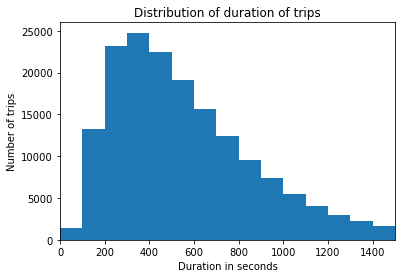

In [26]:
bin_edges = np.arange(0, Ford_GoBike_df['duration_sec'].max()+100, 100)
plt.hist(data = Ford_GoBike_df, x= 'duration_sec', bins =bin_edges)
plt.xlim(0, 1500)
plt.title('Distribution of duration of trips')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of trips');

#### The above histogram shows that most rides last between 300 and 400 secs. This is about 5 to 6.5 minutes

####  #We need to do a bivariate analysis of the duration and distance to get a clearer understing of the relationship between them.


#### 2. Let us check the specific days of the week when the trps were made.

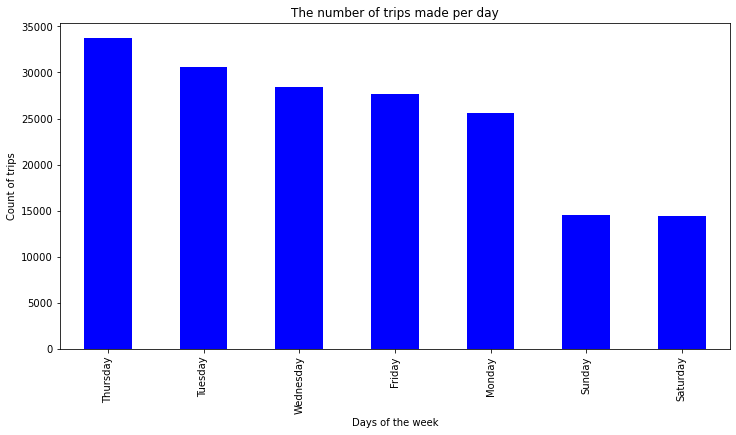

In [27]:
Ford_GoBike_df['start_day'].value_counts().plot(kind = 'bar', color = 'blue', figsize=[12,6])
plt.xlabel('Days of the week')
plt.ylabel('Count of trips')
plt.title('The number of trips made per day')
plt.show;

#### Weekdays have a high number of trips made with Thursday having the highest number of trips.
#### Fewer trips are made during the weekends

#### 3. Checking the specific hours of the day when the trips 

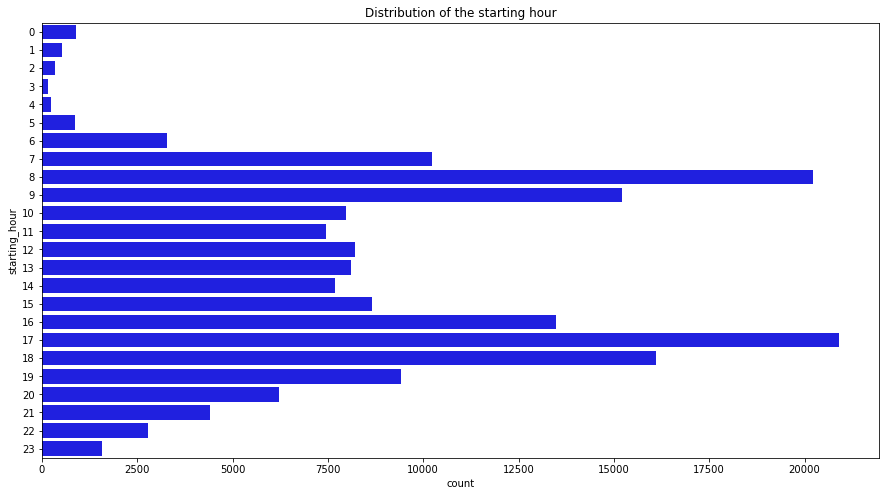

In [28]:
plt.figure(figsize=[15,8])
sns.countplot(data = Ford_GoBike_df, y = 'starting_hour', color='blue')
plt.title('Distribution of the starting hour');

#### Most people start their rides at 8am and 5pm.

#### ##Let us also check what time most rides end.

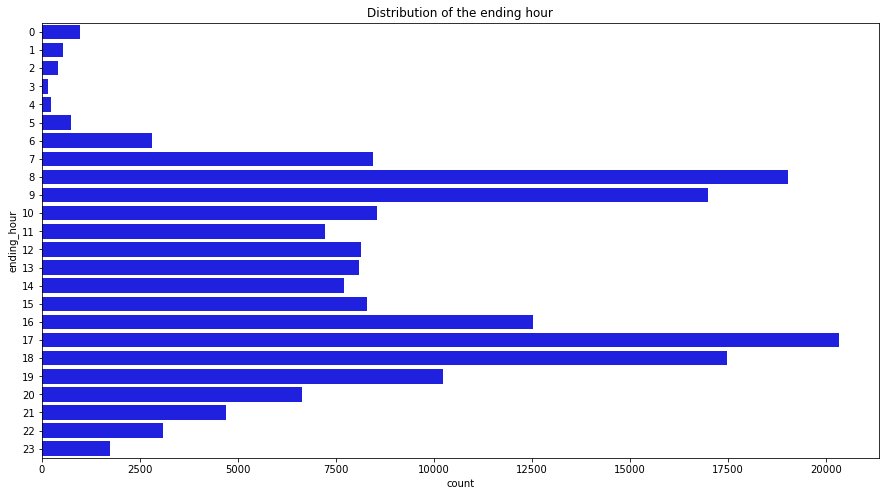

In [29]:
plt.figure(figsize=[15,8])
sns.countplot(data = Ford_GoBike_df, y = 'ending_hour', color='blue')
plt.title('Distribution of the ending hour');

#### Similarly, most people end their rides at 8am and 5pm.

#### 4. Exploring the specific day of the month when the most trips were made.

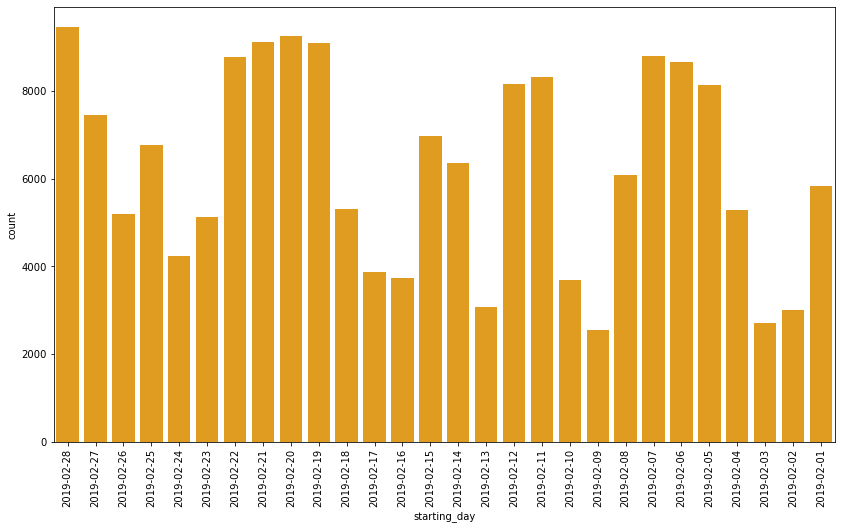

In [30]:
plt.figure(figsize=[14,8])
sns.countplot(data = Ford_GoBike_df, x = 'starting_day', color='orange')
plt.xticks(rotation = 90);

#### Most rides were started on 28th February. This could be because it is the last day of the month

#### 5. Let us explore the user type with the most rides 

In [31]:
user_type_numbers = Ford_GoBike_df['user_type'].value_counts()

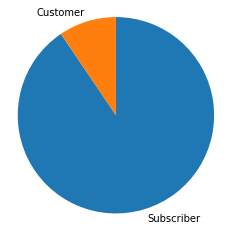

In [32]:
plt.pie(user_type_numbers, labels= user_type_numbers.index, startangle = 90, counterclock = False);
plt.axis('square');

##### The pie chart shows that there are more subscribers than customers

#### 6. Let us explore the gender of the riders

In [33]:
gender_of_riders = Ford_GoBike_df['member_gender'].value_counts() 

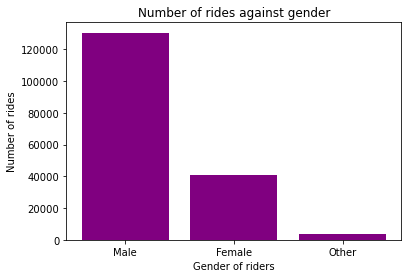

In [34]:
x = ['Male', 'Female', 'Other']
y = gender_of_riders
plt.bar(x, y, color = 'purple')
plt.xlabel('Gender of riders')
plt.ylabel('Number of rides')
plt.title('Number of rides against gender')
plt.show;

#### Males comprise of the highest gender of riders

#### 7.We check whether most riders share bikes for all trips or not

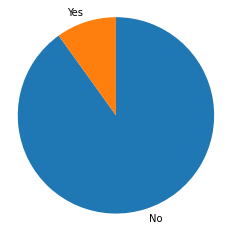

In [35]:
bike_sharing = Ford_GoBike_df['bike_share_for_all_trip'].value_counts()

plt.pie(bike_sharing, labels= bike_sharing.index, startangle = 90, counterclock = False);
plt.axis('square');

#### Most riders do not share bikes for their trips

#### 8. We can check which start and end stations has the highest number of riders 

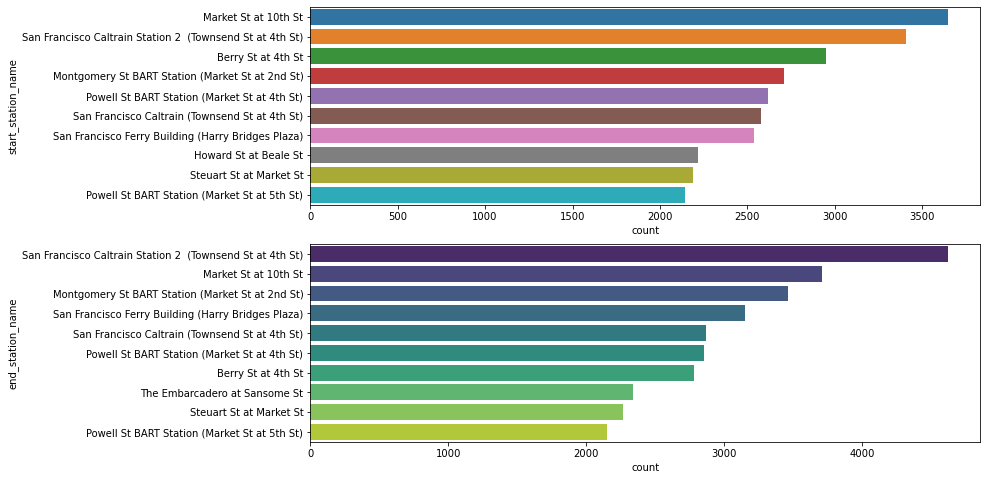

In [36]:
order_of_start_stations = Ford_GoBike_df['start_station_name'].value_counts().iloc[:10].index
plt.figure(figsize = [12,8])
# The first subplot will show the start station with the highest number of riders
plt.subplot(2,1,1)
sns.countplot(data = Ford_GoBike_df, y = 'start_station_name',order = order_of_start_stations)

# The second subplot will show the end station with the highest rides.
order_of_end_stations = Ford_GoBike_df['end_station_name'].value_counts().iloc[:10].index
plt.subplot(2,1,2)
sns.countplot(data = Ford_GoBike_df, y = 'end_station_name', palette = 'viridis', order = order_of_end_stations);

#### Most rides start at Market St at 10th St station and end at San Franscisco Caltrian Station 2.

#### 9. The start and end stations with the least rides.


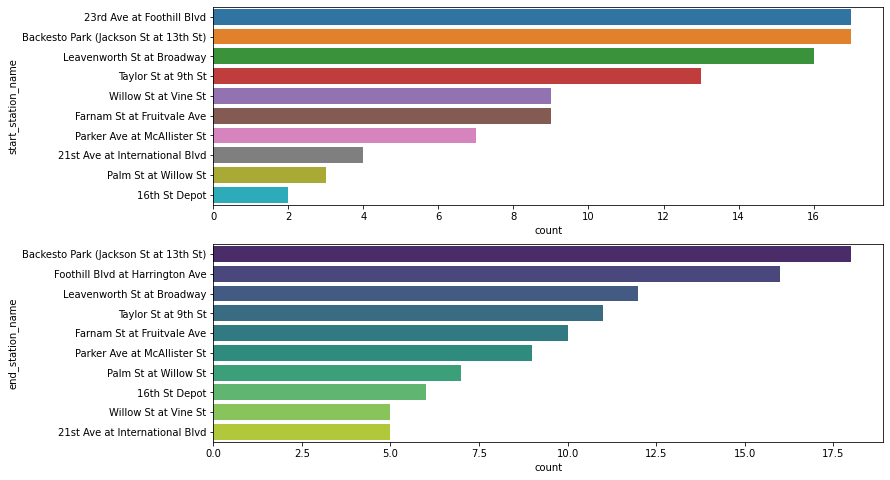

In [37]:
order_of_start_stations = Ford_GoBike_df['start_station_name'].value_counts().iloc[-10:].index
plt.figure(figsize = [12,8])
# The first subplot will show the start station with the least number of riders
plt.subplot(2,1,1)
sns.countplot(data = Ford_GoBike_df, y = 'start_station_name',order = order_of_start_stations)

# The second subplot will show the end station with the least rides.
order_of_end_stations = Ford_GoBike_df['end_station_name'].value_counts().iloc[-10:].index
plt.subplot(2,1,2)
sns.countplot(data = Ford_GoBike_df, y = 'end_station_name', palette = 'viridis', order = order_of_end_stations);

#### The least rides start at 16th St Depot and end at either Willow St at Vine St or 21st Ave at International Blvdm

#### 10. Let us check the distribution of the age of the riders

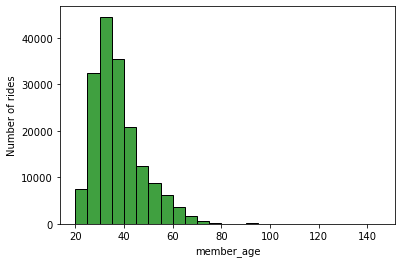

In [38]:
bin_edges = np.arange(20, Ford_GoBike_df['member_age'].max()+5, 5)
sns.histplot(Ford_GoBike_df['member_age'], bins = bin_edges, kde = False, color = 'green')
plt.ylabel('Number of rides');

#### Most riders' ages are between 30 and 35 years

## BIVARIATE ANALYSIS

#### 1. What is the relationship between age and the duration of the rides?

##### We plot a regression plot so as to see the relationship between the age of the member and the time they take durig their bike rides

<AxesSubplot:xlabel='member_age', ylabel='duration_sec'>

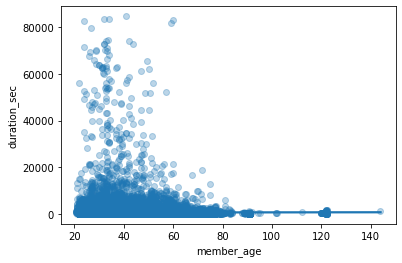

In [81]:
sns.regplot(data = Ford_GoBike_df,x='member_age', y='duration_sec',x_jitter=0.3, scatter_kws={'alpha':0.3} )

- There's not a strong relationship between the age of the rides and the duration of the rides. 
- Younger people ride for longer periods of the time.

#### 2. What is the relationship between the duration of rides and the gender of the riders

##### Plot a box plot and a violin plot to visualize the reltionship between member gender and the duration of the rdes they undertake

In [106]:
# We covert the time to minutes since it will be easier to use it in minutes

Ford_GoBike_df['duration_min']= Ford_GoBike_df['duration_sec']/60

<AxesSubplot:xlabel='member_gender', ylabel='duration_min'>

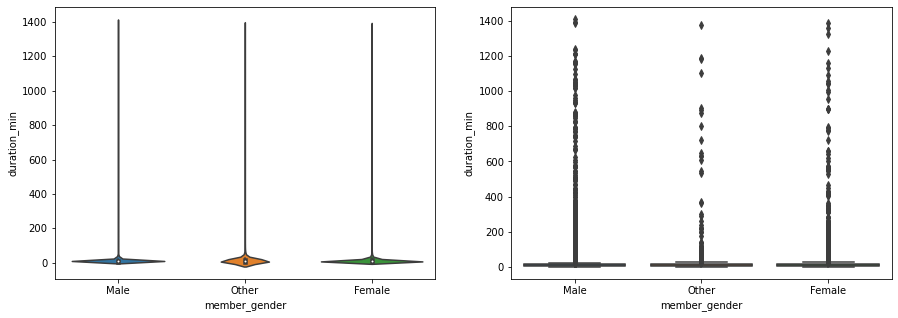

In [109]:
plt.figure(figsize=[15,5])

# Left plot is the violin plot
plt.subplot(1,2,1)
sns.violinplot(data=Ford_GoBike_df, x='member_gender', y='duration_min')
#right plot is the box plot
plt.subplot(1,2,2)
sns.boxplot(data=Ford_GoBike_df, x='member_gender', y='duration_min')

#### From the box plot and violin plot above, we can see that males ride longer durations as compared to the other genders

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
1. Younger people cycle for longer durations.
2. Males ride for longer durations

## MULTIVARIATE ANALYSIS

#### 1.. What is the relationship between member age, duration and user type

#### Here, we shall plot a scatterplot to show how member age , duration and user type are inter-related.

C:\Users\mwendwa\anaconda3\envs\Udacity_Projects\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


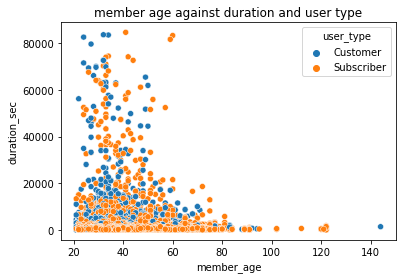

In [61]:
x = Ford_GoBike_df['member_age']
y = Ford_GoBike_df['duration_sec']
sns.scatterplot(x, y, hue=Ford_GoBike_df['user_type'], x_jitter=0.2)
plt.title('member age against duration and user type')
plt.show();

- In all cases younger riders between 20 and 45 years ride bikes for longer dureations. 
- However, subscribers ride for longer periods of tme.

#### 2. Let us see the distribution of count of all genders and their respective usery type

#### Here, we plot a countplot to see the numner of riders with their respective genders.

Text(0.5, 1.0, 'Count of genders and their respective user_types')

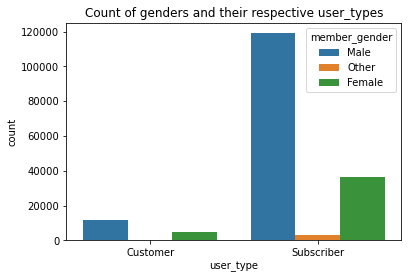

In [296]:
sns.countplot(data = Ford_GoBike_df, x= 'user_type', hue = 'member_gender' )
plt.title('Count of genders and their respective user_types')

#### Males are the most riders irrespective of the user_type.

#### 3. What is the distribution of the number of rides, user_type and gender of riders

#### We plot a heatplot to visualize the count of the riders' genders together with their user type

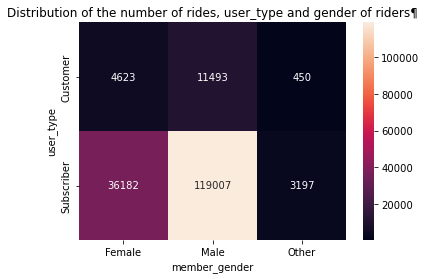

In [315]:
counts_of_gender_and_type = Ford_GoBike_df.groupby(['user_type','member_gender']).size()
counts_of_gender_and_type = counts_of_gender_and_type.reset_index(name = 'count')
counts_of_gender_and_type = counts_of_gender_and_type.pivot(index = 'user_type', columns = 'member_gender',values = 'count')
sns.heatmap(counts_of_gender_and_type, annot = True, fmt='d')
plt.title('Distribution of the number of rides, user_type and gender of riders¶');

#### Most of the riders comprise of male subscribers

##### 4. What is the daily duration of the usage of bikes for each user type

###### We plot a pointplot to show the point estimate of the daily duration of the rides

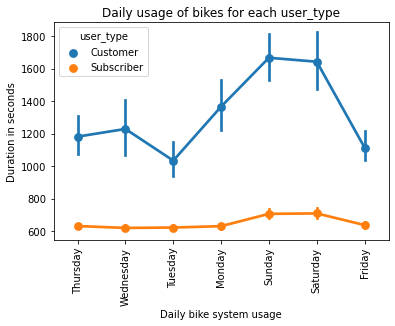

In [309]:
sns.pointplot(data = Ford_GoBike_df, x = 'start_day', y = 'duration_sec', hue = 'user_type')
plt.xlabel('Daily bike system usage')
plt.ylabel('Duration in seconds')
plt.title('Daily usage of bikes for each user_type')
plt.xticks(rotation=90);

#### Customers cycle more during weekdays while subscribers cycle any day of the week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- Customers cycle more during weekdays while subscribers cycle any day of the week.
- Most of the riders comprise of male subscribers

### CONCLUSIONS/INSIGHTS

1. Most rides are made at 8am and 5pm. This could be explained by the fact that people go to work and go back home at the said times.
2. Most rides are made on the last day of the month which was 28th February.
3. Most of the riders are subscribers.
4. Most riders are between 30 and 35 years old.

### RECOMENDATIONS
1. Ford GoBike can reduce the prices of renting the bikes to the customers on the last day of the month so as to increase their revenue or so as to encourage the customers to become subsribers.
2. There being fewer female riders, the company should do more advertising to attract more female customers and potentially subscribers.

### References
1.https://seaborn.pydata.org/tutorial/color_palettes.html

2.https://pandas.pydata.org/docs/
